<a href="https://colab.research.google.com/github/nouhaz01/projet_final/blob/tsne_kmeans/tsne_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!python --version

Python 3.10.12


In [3]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 29.0 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=7e57c0bbc75c35dbac06ac95a7584c5d1b0c74708c0abb56a18b5fd5357b2ffd
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [19]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

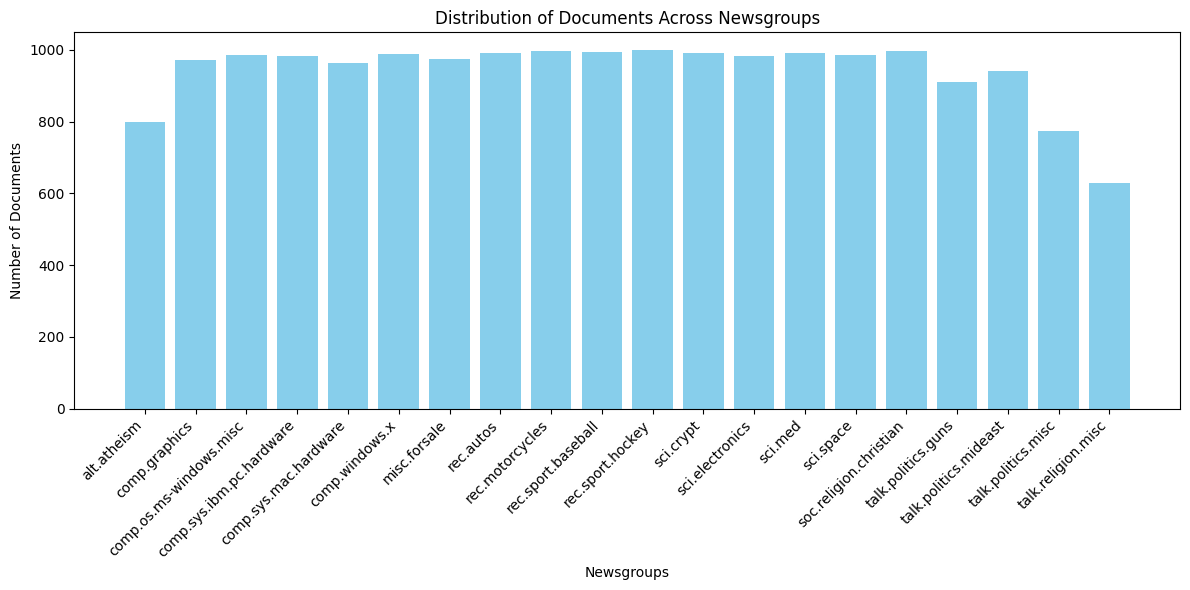

In [20]:
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

category_counts = {}
for category in newsgroups.target_names:
    category_counts[category] = sum(newsgroups.target == newsgroups.target_names.index(category))

# Plot the distribution
plt.figure(figsize=(12, 6))
plt.bar(category_counts.keys(), category_counts.values(), color='skyblue')
plt.xlabel('Newsgroups')
plt.ylabel('Number of Documents')
plt.title('Distribution of Documents Across Newsgroups')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [5]:
train_data = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
all_indices = np.arange(len(train_data.data))
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

np.random.shuffle(all_indices)

selected_indices = all_indices[:2000]

corpus_train = [train_data.data[i] for i in selected_indices]
labels_train = [train_data.target[i] for i in selected_indices]

train = pd.DataFrame({'Document': corpus_train, 'Category': labels_train})

embeddings = model.encode(corpus_train)

.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [21]:
train.head()

,Document,Category
0,Bzzzt. The 750SS is 40 pounds lighter than th...,8
1,\nThis must have been in the works for some ti...,11
2,"Hi folks\nThanks to the ones that replied, how...",5
3,\n ^^^^^^^^^^^^\nHow do you do bus-mastering o...,3
4,Sixteen days I had put off test driving the Ho...,8


In [22]:
tsne = TSNE(n_components=3)
embedded_data = tsne.fit_transform(embeddings


SyntaxError: ignored

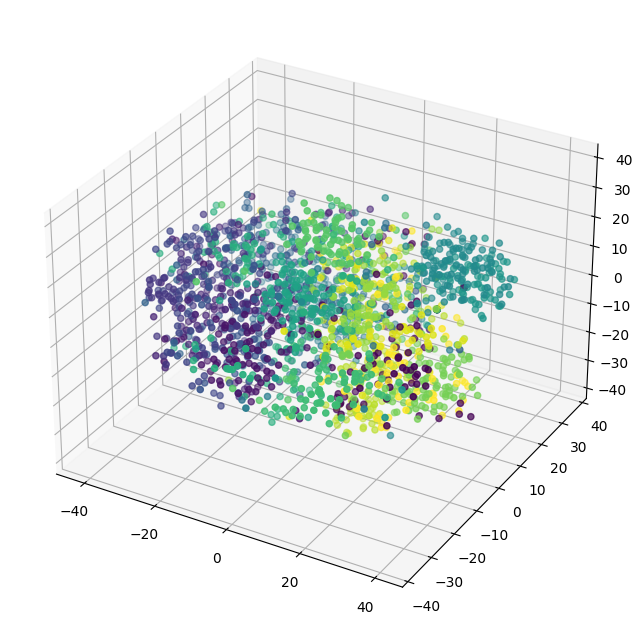

In [12]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embedded_data[:, 0], embedded_data[:, 1], embedded_data[:, 2], c=labels_train, cmap='viridis')
plt.show()

In [14]:
def clust(mat, k):

    kmeans = KMeans(n_clusters=k, random_state=42)
    pred = kmeans.fit_predict(mat)

    return pred

In [15]:
pred = clust(embedded_data, 20)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
def score(pred, labels_train):
  nmi_score = normalized_mutual_info_score(pred, labels_train)
  ari_score = adjusted_rand_score(pred, labels_train)

  print(f'NMI: {nmi_score:.2f}\nARI: {ari_score:.2f}')

  return(nmi_score, ari_score)

In [18]:
score(pred, labels_train)

NMI: 0.43
ARI: 0.26


(0.4255095983765372, 0.25567701698139145)